# Final Project Notebook

DS 5001 Exploratory Text Analytics | Spring 2024

In [1]:
from IPython.display import Image # Workaround to get images to display in html export

# Metadata

- Full Name: Hayden French
- Userid: hmf9kx
- GitHub Repo URL: https://github.com/hmf9kx/DS5001FinalProject
- UVA Box URL: https://virginia.box.com/s/rf7v528sv9goe93qponasve9yyjcjduy

# Overview

The goal of the final project is for you to create a **digital analytical edition** of a corpus using the tools, practices, and perspectives you’ve learning in this course. You will select a corpus that has already been digitized and transcribed, parse that into an F-compliant set of tables, and then generate and visualize the results of a series of fitted models. You will also draw some tentative conclusions regarding the linguistic, cultural, psychological, or historical features represented by your corpus. The point of the exercise is to have you work with a corpus through the entire pipeline from ingestion to interpretation. 

Specifically, you will acquire a collection of long-form texts and perform the following operations:

- **Convert** the collection from their source formats (F0) into a set of tables that conform to the Standard Text Analytic Data Model (F2).
- **Annotate** these tables with statistical and linguistic features using NLP libraries such as NLTK (F3).
- **Produce** a vector representation of the corpus to generate TFIDF values to add to the TOKEN (aka CORPUS) and VOCAB tables (F4).
- **Model** the annotated and vectorized model with tables and features derived from the application of unsupervised methods, including PCA, LDA, and word2vec (F5).
- **Explore** your results using statistical and visual methods.
- **Present** conclusions about patterns observed in the corpus by means of these operations.

When you are finished, you will make the results of your work available in GitHub (for code) and UVA Box (for data). You will submit to Gradescope (via Canvas) a PDF version of a Jupyter notebook that contains the information listed below.

# Some Details

- Please fill out your answers in each task below by editing the markdown cell. 
- Replace text that asks you to insert something with the thing, i.e. replace `(INSERT IMAGE HERE)` with an image element, e.g. `![](image.png)`.
- For URLs, just paste the raw URL directly into the text area. Don't worry about providing link labels using `[label](link)`.
- Please do not alter the structure of the document or cell, i.e. the bulleted lists. 
- You may add explanatory paragraphs below the bulleted lists.
- Please name your tables as they are named in each task below.
- Tasks are indicated by headers with point values in parentheses.

# Raw Data

## Source Description (1)

Provide a brief description of your source material, including its provenance and content. Tell us where you found it and what kind of content it contains.

The data for this project come from UC Santa Cruz's Natural Language and Dialogue Systems (NLDS) lab. They have created a publicly available corpus of over a thousand film scripts scraped from the The Internet Movie Script Database (imsdb.com). The scripts are stored as text files and are grouped by the film's genres. I thought it would be interesting to compare movies from different genres via the techniques we have discussed throughout the semester. Note that while the original dataset is very large, I have selected 24 films across 5 genres for analysis.

## Source Features (1)

Add values for the following items. (Do this for all following bulleted lists.)

- Source URL: https://nlds.soe.ucsc.edu/fc2
- UVA Box URL: https://virginia.box.com/s/dl0u1rcar84s5u6btczz956ea3ngwuwf
- Number of raw documents: 24
- Total size of raw documents (e.g. in MB): 4.45 MB
- File format(s), e.g. XML, plaintext, etc.: plaintext

## Source Document Structure (1)

Provide a brief description of the internal structure of each document. That, describe the typical elements found in document and their relation to each other. For example, a corpus of letters might be described as having a date, an addressee, a salutation, a set of content paragraphs, and closing. If they are various structures, state that.

Each document consists of the raw text of a movie script scraped from the The Internet Movie Script Database. Documents are generally 100-200 MBs and close to 10,000 lines (including whitespace). The files includes both scene descriptions and the dialogue from the film. Additionally, some scripts included page numbers in the txt file. I manually selected scripts which included page numbers as that added an additional layer to my OHCO structure.

# Parsed and Annotated Data

Parse the raw data into the three core tables of your addition: the `LIB`, `CORPUS`, and `VOCAB` tables.

These tables will be stored as CSV files with header rows.

You may consider using `|` as a delimitter.

Provide the following information for each.

## LIB (2)

The source documents the corpus comprises. These may be books, plays, newspaper articles, abstracts, blog posts, etc. 

Note that these are *not* documents in the sense used to describe a bag-of-words representation of a text, e.g. chapter.

- UVA Box URL: https://virginia.box.com/s/j5y1oa6dr80j0jnh5h9cbovoft15pelh
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Number of observations: 24
- List of features, including at least three that may be used for model summarization (e.g. date, author, etc.): `script_id`, `name`, `title`, `genre`, `path`, `replace_dict`, `drop_words`, `page_pat`
- Average length of each document in characters: ~200,000

Notes: While there many scripts in the original data, I selected 4 for each of the 5 genres I was interested in (Western, Sci-Fi, Horror, Comedy, and Romance). This was because parsing the scripts into the OHCO required a lot of manual work. I selected scripts that included page numbers so I could add that level to my hierarchy. The formatting was also not as standardized as I had originally hoped, so I had to specify regexes to match the different page number formats.

## CORPUS (2)

The sequence of word tokens in the corpus, indexed by their location in the corpus and document structures.

- UVA Box URL: https://virginia.box.com/s/o0yki6nb7kxp8tjullhxdqs8r4m6bpt0
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Number of observations Between (should be >= 500,000 and <= 2,000,000 observations.): 574,748
- OHCO Structure (as delimitted column names): `script_id`,	`page_num`,	`sent_num`,	`token_num`	
- Columns (as delimitted column names, including `token_str`, `term_str`, `pos`, and `pos_group`): `script_id`,	`page_num`,	`sent_num`,	`token_num`, `pos_tuple`, `pos`, `token_str`, `term_str`, `pos_group`

## VOCAB (2)

The unique word types (terms) in the corpus.

- UVA Box URL: https://virginia.box.com/s/7kax43z51qztkz57pb31wxtceby6tyn8
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Number of observations: 22217
- Columns (as delimitted names, including `n`, `p`', `i`, `dfidf`, `porter_stem`, `max_pos` and `max_pos_group`, `stop`): `term_str`, `n`, `p`,	`i`, `n_chars`,	`max_pos_group`, `max_pos`,	`p_stem`, `stop`, `DFIDF`,
- Note: Your VOCAB may contain ngrams. If so, add a feature for `ngram_length`.
- List the top 20 significant words in the corpus by DFIDF.

'down', 'not', 'me', 'into', 'have', 'there', 'back', 'be', 'they', 'just', 're', 'looks', 'like', 'one', 'no', 'all', 'then', 'she', 'him', 'but'

# Derived Tables

## BOW (3)

A bag-of-words representation of the CORPUS.

- UVA Box URL: https://virginia.box.com/s/zcaw8hh2wyvpunlp5495hiq0mw5xq4wi
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Bag (expressed in terms of OHCO levels): `script_id`, `page_num`
- Number of observations: 321,665
- Columns (as delimitted names, including `n`, `tfidf`): `script_id`, `page_num`, `term_str`, `n`, `tfidf`

## DTM (3)

A represenation of the BOW as a sparse count matrix.

- UVA Box URL: https://virginia.box.com/s/jqvohm9dec8il323fhf59adi76mveigj
- UVA Box URL of BOW used to generate (if applicable): https://virginia.app.box.com/file/1516177645215
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Bag (expressed in terms of OHCO levels): `script_id`, `page_num`

## TFIDF (3)

A Document-Term matrix with TFIDF values.

- UVA Box URL: https://virginia.box.com/s/x4qcc5d4wymg9avq84bksv0w3e5a74o6
- UVA Box URL of DTM or BOW used to create: https://virginia.box.com/s/zcaw8hh2wyvpunlp5495hiq0mw5xq4wi
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Description of TFIDIF formula ($\LaTeX$ OK): I computed the maximum TFIDF: $$\Large w_{t,d} = \frac{f_{t,d}}{max_{\{t^\prime\in d\}} f_{t^\prime,d}} * log(\frac{N}{f_d})$$ where $f_{t,d}$ is the count of term $t$ in document $d$ and where $f_d$ is the count of documents containing term $t$

## Reduced and Normalized TFIDF_L2 (3)

A Document-Term matrix with L2 normalized TFIDF values.

- UVA Box URL: https://virginia.box.com/s/7hwtgoj0ghylcbnqp2f2r9mre3w5qbgg
- UVA Box URL of source TFIDF table: https://virginia.box.com/s/x4qcc5d4wymg9avq84bksv0w3e5a74o6
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Number of features (i.e. significant words): 1000
- Principle of significant word selection: Top 1000 signficant words based on DFIDF value

# Models

## PCA Components (4)

- UVA Box URL: https://virginia.box.com/s/nd3gj9imka395yng5nfyxzm0dfau31ia
- UVA Box URL of the source TFIDF_L2 table: https://virginia.box.com/s/7hwtgoj0ghylcbnqp2f2r9mre3w5qbgg
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Number of components: 10
- Library used to generate: Adapted from the in-class example which was created from scratch, with help from the scipy library
- Top 5 positive terms for first component: mrs, door, room, int, dr
- Top 5 negative terms for second component: mrs, mother, truck, group, bug

Notes: While the terms are not particularly interesting, it is pretty clear that these would appear in many of the scripts. It is worth noting that terms such as `mrs`, `dr`, and `mother` likely dominate the dialogues in several scripts, whereas `door`, `room`, and `int` (i.e. interior) would be used in establishing scenes.

## PCA DCM (4)

The document-component matrix generated.

- UVA Box URL: https://virginia.box.com/s/xphxze32r2uhuiawyobc7z1hymqmtyeb
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`

## PCA Loadings (4)

The component-term matrix generated.

- UVA Box URL: https://virginia.box.com/s/6qiqabfqofzdukkzm09rngcexrhd1auo
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`

## PCA Visualization 1 (4)

Include a scatterplot of documents in the space created by the first two components.

Color the points based on a metadata feature associated with the documents.

Also include a scatterplot of the loadings for the same two components. (This does not need a feature mapped onto color.)

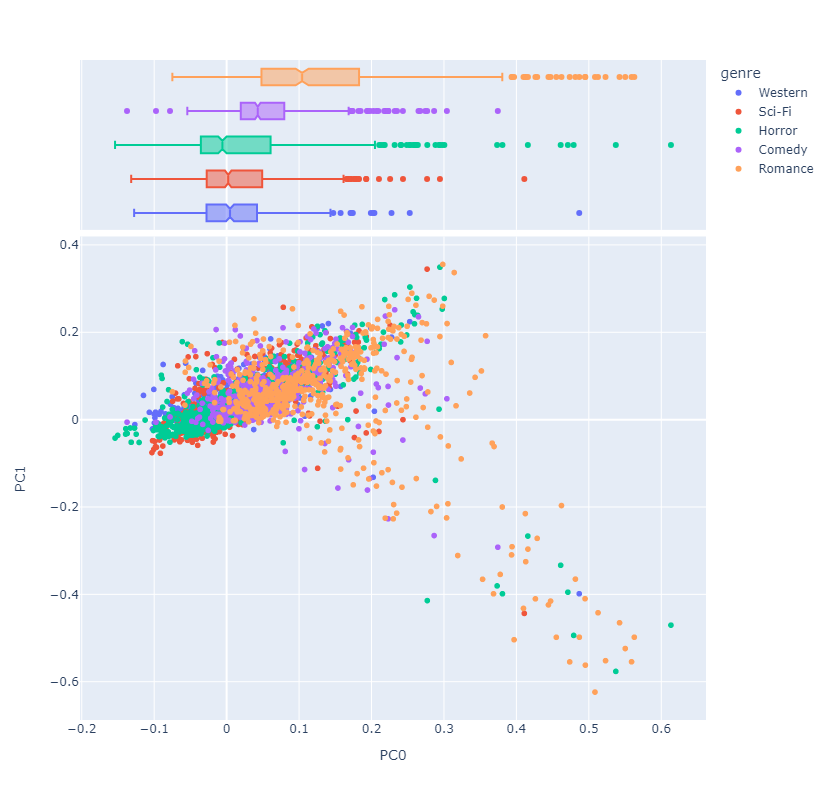

In [2]:
Image(filename='./Images/pc1.png')

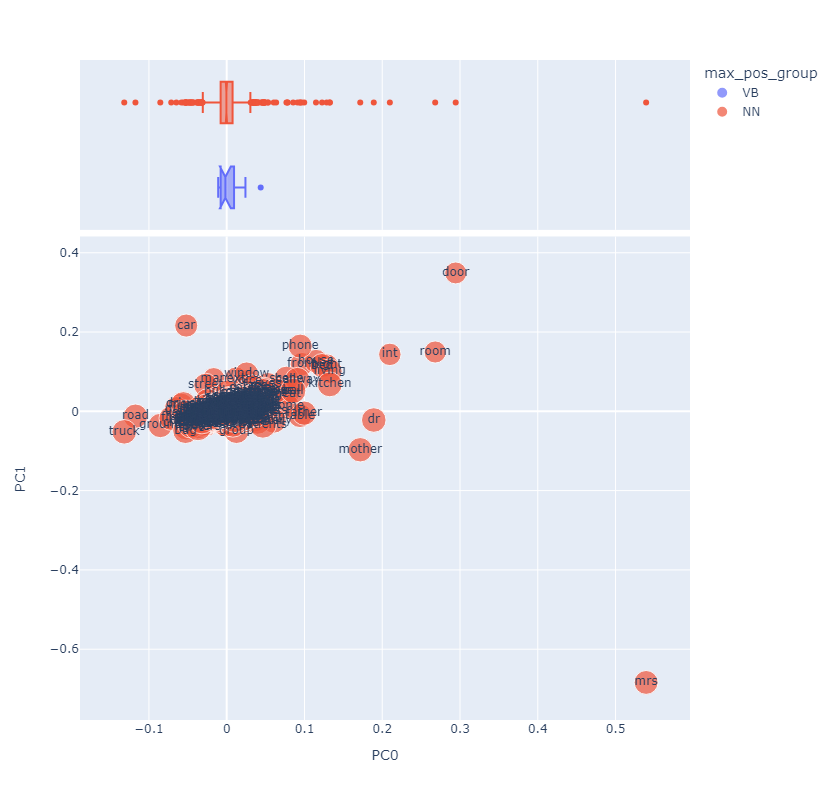

In [3]:
Image(filename='./Images/l1.png')

Briefly describe the nature of the polarity you see in the first component:

The polarity of the first two components in conjunction seem to represent a polarity between interior dialogue and exterior action.  Values high along the first component include `mrs`, `dr`, and `mother` (used for dialogue) as well as `room`, `int` (interior), and `kitchen`. Values at the other end include `truck`, `road`, `gun`, `fire`, and `horse`. It is worth noting how much of an outlier `mrs` is. I suspect that is a term used very frequently in dialogue across many of the scripts. It would likely have been joined by other names/pronouns had they not been removed.

## PCA Visualization 2 (4)

Include a scatterplot of documents in the space created by the second two components.

Color the points based on a metadata feature associated with the documents.

Also include a scatterplot of the loadings for the same two components. (This does not need a feature mapped onto color.)

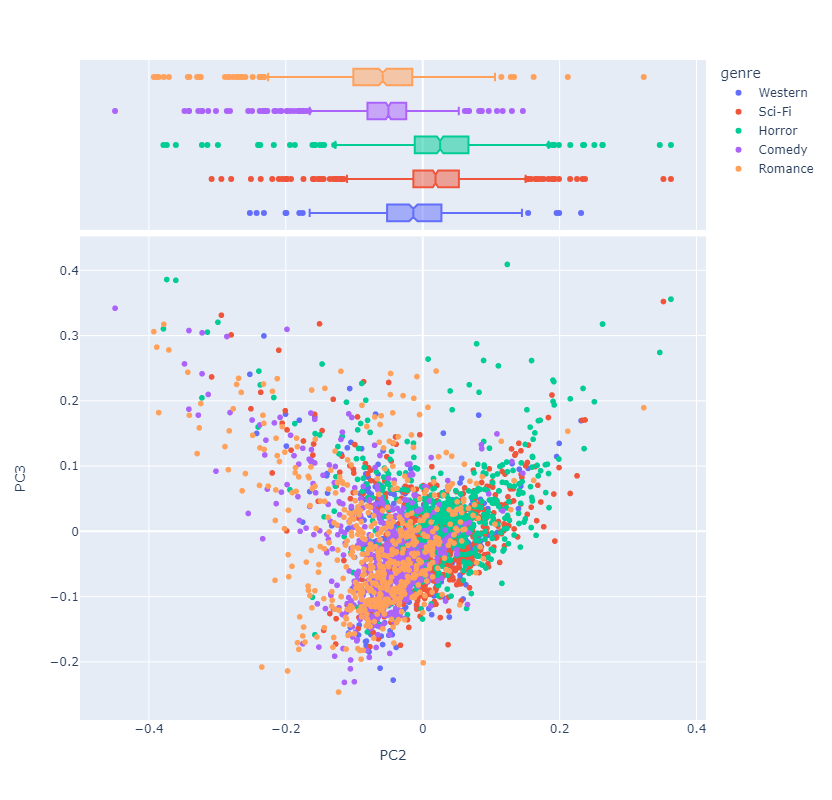

In [4]:
Image(filename='./Images/pc2.png')

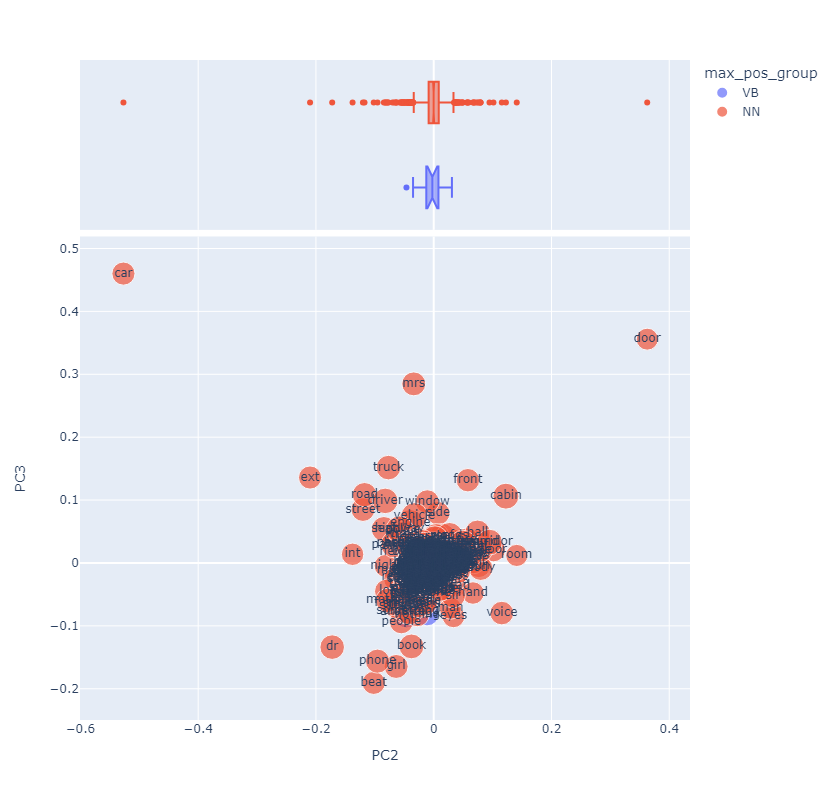

In [5]:
Image(filename='./Images/l2.png')

Briefly describe the nature of the polarity you see in the second component:

The second pairing of components is harder to interpret. Without too much speculation, I think some conclusions can be drawn from the box and whisker plots. It is interesting how comedy and romance are shifted left along the principal component whereas horror and sci-fi are shifted right, with western in the middle. I think it is fair to say that romance and comedy are the two most similar genres, especially since some of the films selected could be classified as rom-coms. They are contrasted with sci-fi and horror, which have the potential to contain the heaviest themes. So it is possible this component represents the theming or sentiment of the different genres. Whether or not this is an accurate interpretation, this is an idea that I will explore further later on.

## LDA TOPIC (4)

- UVA Box URL: https://virginia.box.com/s/9yuzvkm2700rmgsd8rwgjw6esfncx9fe
- UVA Box URL of count matrix used to create: https://virginia.box.com/s/jqvohm9dec8il323fhf59adi76mveigj
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Libary used to compute: sklearn
- A description of any filtering, e.g. POS (Nouns and Verbs only): Nouns only
- Number of components: 20
- Any other parameters used:
- Top 5 words and best-guess labels for top five topics by mean document weight:
  - T00: door room dr face hand (hospital room)
  - T01: ext way door gun beat (exterior conflict)
  - T02: car ext man int street	(street scene)
  - T03: door int room night bed (nighttime bedroom scene)
  - T04: room int table people way (interior discussion)

## LDA THETA (4)

- UVA Box URL: https://virginia.box.com/s/qmugzxl8nbvundyp27m97vy2ar0n3wu1
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`

## LDA PHI (4)

- UVA Box URL: https://virginia.box.com/s/sxxzb2dh45q1qxbc20vlqqqm35sky6v7
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`

## LDA + PCA Visualization (4)

Apply PCA to the PHI table and plot the topics in the space opened by the first two components.

Size the points based on the mean document weight of each topic (using the THETA table).

Color the points basd on a metadata feature from the LIB table.

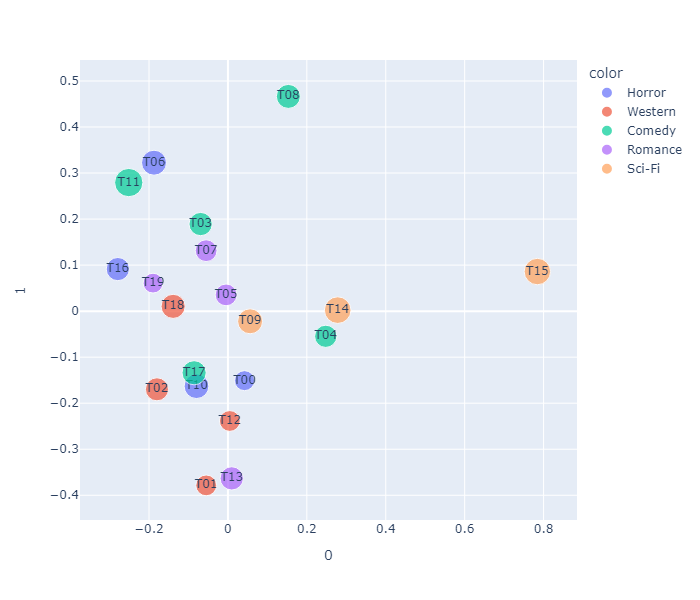

In [6]:
Image(filename='./Images/lda.png')

Provide a brief interpretation of what you see.


We see that genres seem to be clustered fairly well in this space. It is interesting that most topics are on the left side of the graph, indicating similar values for the first principal component. The main exception to this rule is topic 15, which is the 'street scene' topic we saw earlier. I am not sure what about this topic differentiates it so clearly from the others (at least along the first principal component).

## Sentiment VOCAB_SENT (4)

Sentiment values associated with a subset of the VOCAB from a curated sentiment lexicon.

- UVA Box URL: https://virginia.box.com/s/wbvhueqcpli42xhswq11n2nxawgzeygm
- UVA Box URL for source lexicon: https://virginia.box.com/s/rs2gc1h48m94u93qz3vv6u4ha6ilnypt
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`

## Sentiment BOW_SENT (4)

Sentiment values from VOCAB_SENT mapped onto BOW.

- UVA Box URL: https://virginia.box.com/s/jenp8v4nhu7shu68bv4h1051aipobqsi
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`

## Sentiment DOC_SENT (4)

Computed sentiment per bag computed from BOW_SENT.

- UVA Box URL: https://virginia.box.com/s/u2aqjbv41del4is2l4smdloyzt17tm4k
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `|`
- Document bag expressed in terms of OHCO levels: `script_id`

## Sentiment Plot (4)

Plot sentiment over some metric space, such as time.

If you don't have a metric metadata features, plot sentiment over a feature of your choice.

You may use a bar chart or a line graph.

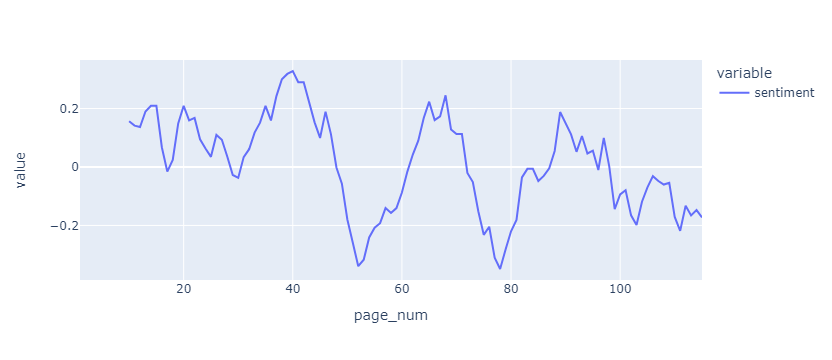

In [7]:
Image(filename='./Images/fault_sentiment.png')

This plot shows the sentiment over time (slightly smoothed as pages were quite granular as a bag) for the movie "The Fault in Our Stars". I chose to visualize this movie as it definitely has its ups and downs, which I think were captured quite accurately. The first two peaks around pages 20 and 40 show the two love interests agreeing to read each other's favorite books and their first kiss, respectively. The first large dip represents an argument, the next peak a successful dinner, and the biggest dip the moment where the two main characters realize that their idol is not who they have made him out to be. The last section contains mainy highs and lows including the death of one of the main characters, the redemption of the idol, and an overall bittersweet ending. Overall, I thought this visual did a good job at summarizing the sentiment of the novel over time.

## VOCAB_W2V (4)

A table of word2vec features associated with terms in the VOCAB table.

- UVA Box URL: https://virginia.box.com/s/fbyii9lf9qqguo117lwz4x6aeh1vpwjs
- GitHub URL for notebook used to create: https://github.com/hmf9kx/DS5001FinalProject/blob/main/FinalProjectCode.ipynb
- Delimitter: `\`
- Document bag expressed in terms of OHCO levels: `script_id`, `page_num`
- Number of features generated: 246
- The library used to generate the embeddings: gensim

## Word2vec tSNE Plot (4)

Plot word embedding featues in two-dimensions using t-SNE.

Describe a cluster in the plot that captures your attention.

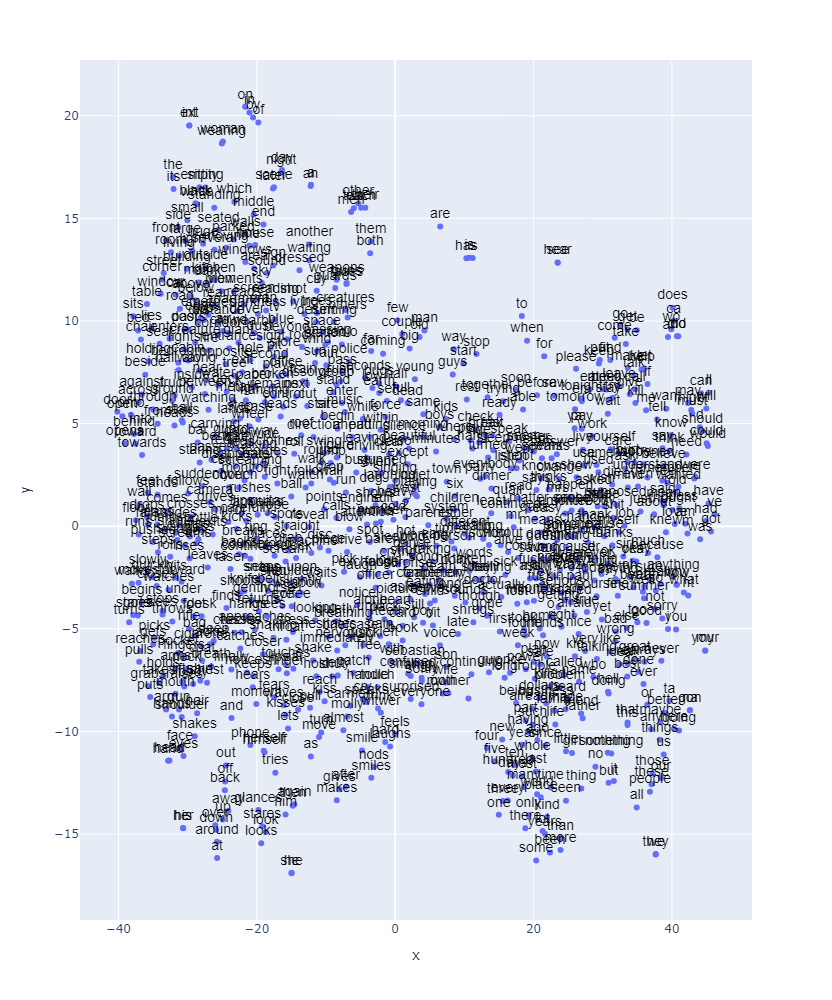

In [8]:
Image(filename='./Images/tsne.png')

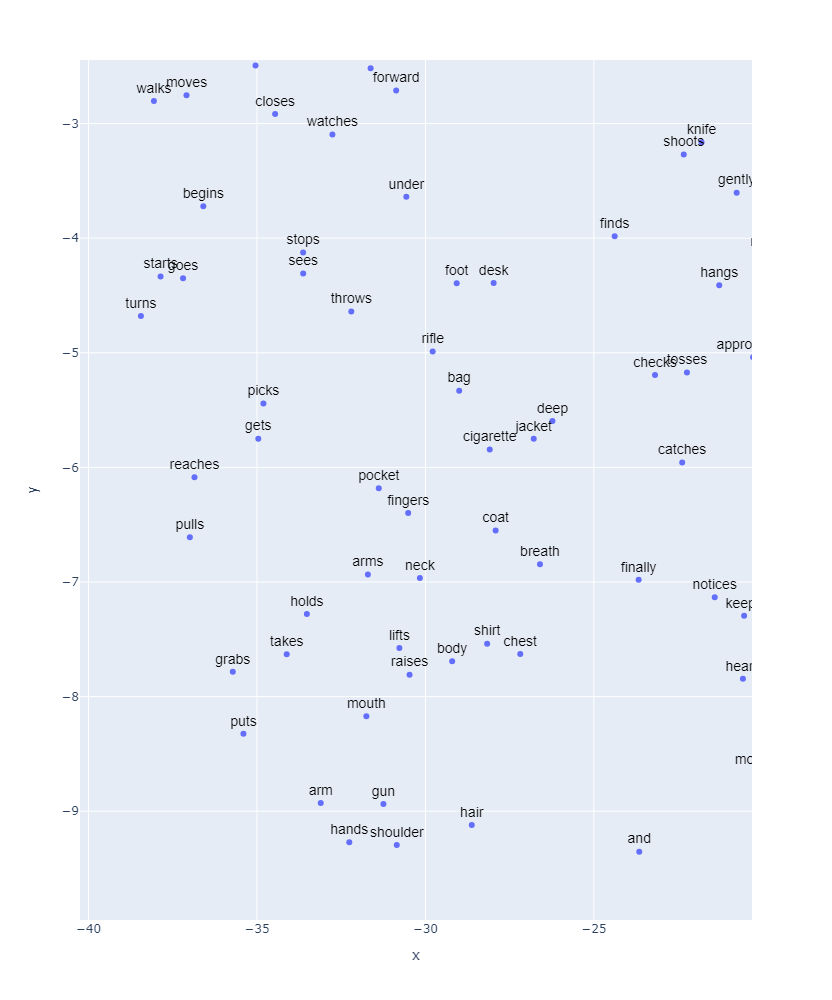

In [9]:
Image(filename='./Images/tsne_zoom.png')

I thought this cluster was interesting, it seems centered around parts of the body (`arms`, `fingers`, `body`), which then extends to corresponding actions (`holds`, `lifts`, `throws`) and items (`jacket`, `gun`, `pocket`)

# Riffs

Provde at least three visualizations that combine the preceding model data in interesting ways.

These should provide insight into how features in the LIB table are related. 

The nature of this relationship is left open to you -- it may be correlation, or mutual information, or something less well defined. 

In doing so, consider the following visualization types:

- Hierarchical cluster diagrams
- Heatmaps
- Scatter plots
- KDE plots
- Dispersion plots
- t-SNE plots
- etc.

## Riff 1 (5)

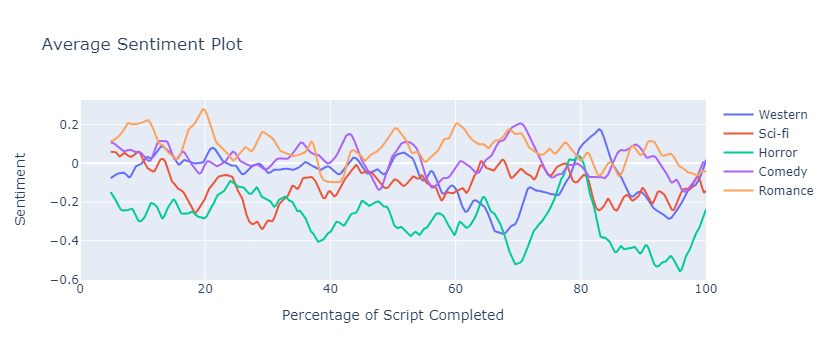

In [10]:
Image(filename='./Images/genre_sentiment.png')

I was interested in extending the sentiment plot over time to other scripts and genres. To look at the aggregate, I normalized the length of each scripts (because of varying page counts) and averaged sentiment by genre over a rolling window. This lets us compare the average sentiment by genre as the story progresses. I was happy to see that the comedy and romance genres float along the top of the graph where as horror tends to stay along the bottom. There is obviously a lot of variation from movie to movie, but there are some larger-scale patterns that emerge. I thought it was interesting that both western and horror movies had a large rise in sentiment around 80% of the way through. Persumably this is some catharsis after the climax of the final conflict.

## Riff 2 (5)

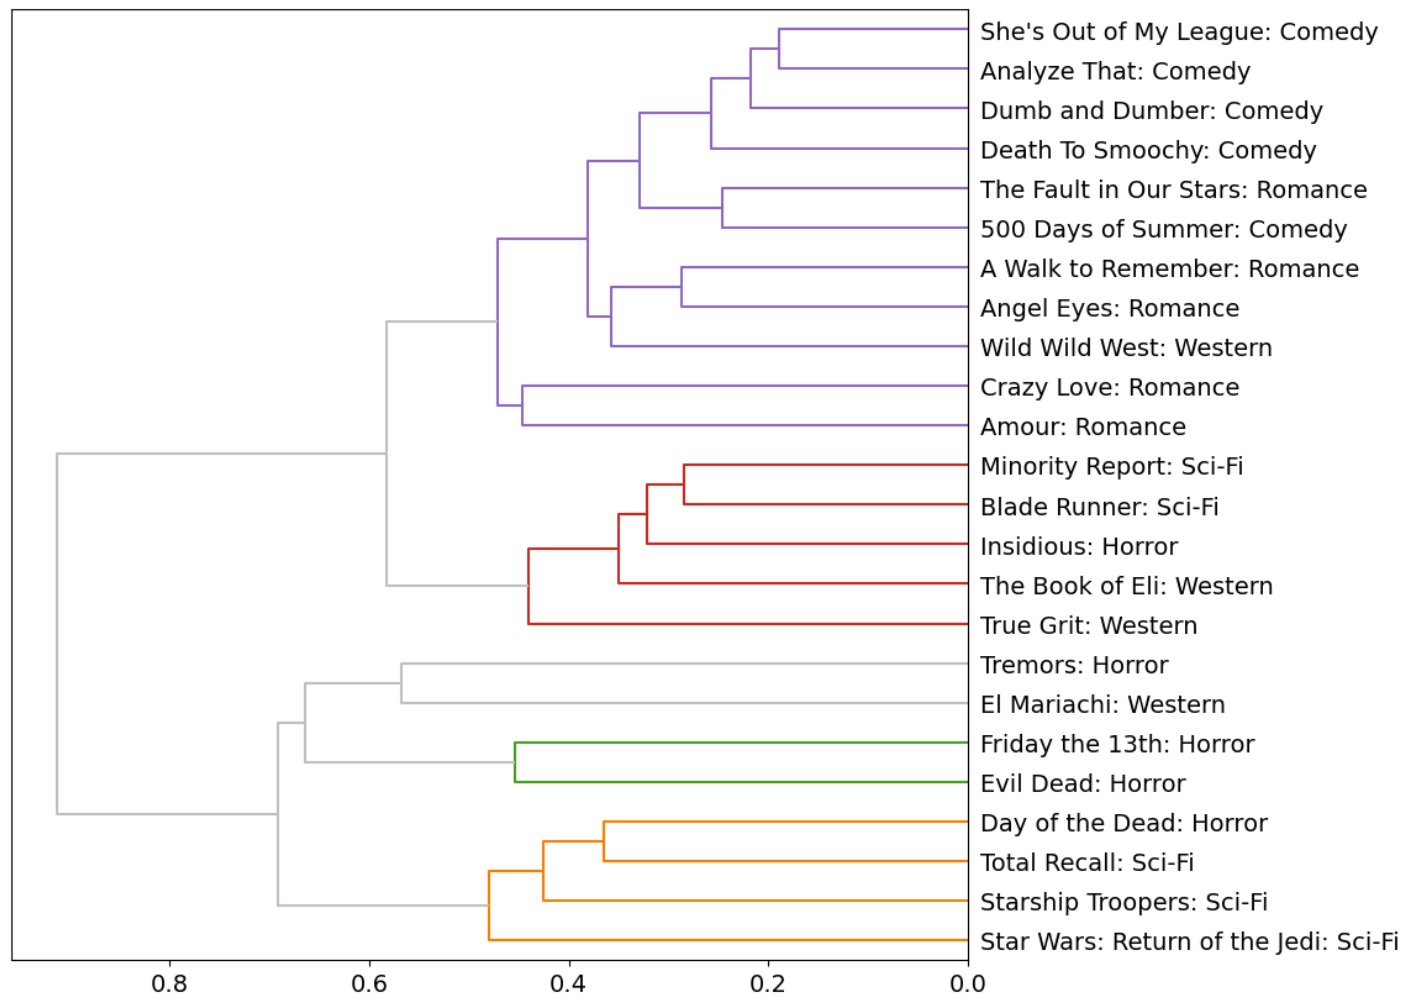

In [11]:
Image(filename='./Images/cluster.png')

I decided to see how well clustering similarity would perform on distinguishing the genres. This graph was generated using cosine similarity and Ward linkage. The clusters came out quite well, especially for comedy and romance. It is interesting to see the same trend from the PCA box and whisker plots represented here, with romance/comedy on one end, horror/sci-fi on the other, and western in the middle.

## Riff 3 (5)

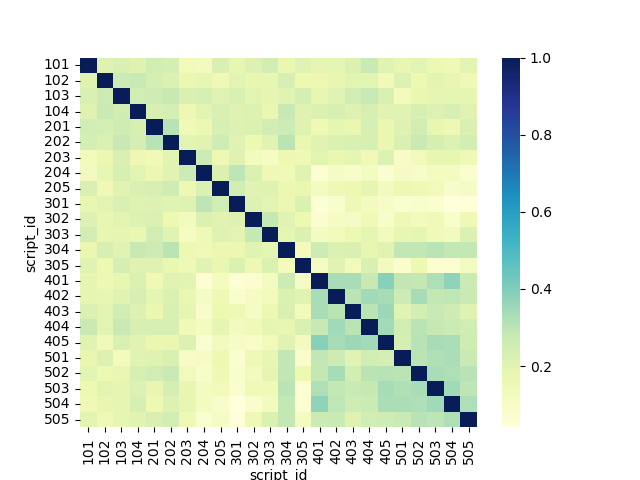

In [12]:
Image(filename='./Images/heatmap.png')

- 100s- Western
- 200s- Sci-Fi
- 300s- Horror
- 400s- Comedy
- 500s- Romance


Finally, I wanted to further examine this idea of the similarity between romance and comedy. I created a heatmap representing the correlation (Kendall rank correlation) between each script. Unsurprisingly, we do see genre-defining boxes around the main diagonal, with the darkest being around the comedies and romances.

# Interpretation (4)

Describe something interesting about your corpus that you discovered during the process of completing this assignment.

At a minumum, use 250 words, but you may use more. You may also add images if you'd like.


I think the most interesting thing I learned from this corpus was the difference in analyzing movie scripts as opposed to the novels we have practiced with in class. The scripts had a hidden internal structure where they contained both scenes and dialogues. The source data also had a corpus that parsed scenes and dialogues separately, but I decided to work with the raw data since a movie is much more than either of these two constituent parts. However, this did mean that words such as interior, exterior, voiceover, etc. which are used conventionally to establish the structure of a scene or the nature of a dialogue appeared time and time again as significant in the corpus. While it is certainly true that these words are important to the writing of a script, I felt that they were more like metadata which served to obfuscate some of my results. I think my PCA suffered the most from this, with some of the main components seeming to represent more surface-level structural dichotomies (e.g. is a scene inside or outside, is it more of a dialogue or an action, etc.) as opposed to the deeper literary patterns I would have liked to discover. With that being said, having genre as a feature led to some interesting analysis. It was neat to see how certain genres (most notably romance and comedy) followed similar distributions across different models. I also felt like the sentiment analysis I did worked quite well for the scripts, potentially because writers must give actors detailed descriptions of their character's emotions. Overall, I do think that there was a lot of value to this analysis and there is still potential for many more results. If I had more time, I would be interested in running separate analyses on the scenes and the dialogues. I could also try and better parse through the vocabulary and remove some of the keywords I mentioned above. Finally, there is much more metadata that I could add to the LIB table. I would be interested to see if patterns in release data, runtime, or even director age/gender would appear in the analysis.